In [2]:
!pip install statsbombpy

In [4]:
#import packages
from statsbombpy import sb
import pandas as pd

In [5]:
#load data
matches = sb.matches(competition_id=2, season_id=27)
matches.head()

/Users/megheaiani/anaconda3/lib/python3.11/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3754058,2016-01-02,16:00:00.000,England - Premier League,2015/2016,Leicester City,AFC Bournemouth,0,0,available,...,2021-06-12T16:17:31.694,20,Regular Season,King Power Stadium,Andre Marriner,Claudio Ranieri,Eddie Howe,1.1.0,2,2
1,3754245,2015-10-17,16:00:00.000,England - Premier League,2015/2016,West Bromwich Albion,Sunderland,1,0,available,...,2021-06-13T16:17:31.694,9,Regular Season,The Hawthorns,Martin Atkinson,Tony Pulis,Sam Allardyce,1.1.0,2,2
2,3754136,2015-12-19,18:30:00.000,England - Premier League,2015/2016,Newcastle United,Aston Villa,1,1,available,...,2021-06-13T16:17:31.694,17,Regular Season,St. James'' Park,Martin Atkinson,Steve McClaren,Rémi Garde,1.1.0,2,2
3,3754037,2016-04-30,16:00:00.000,England - Premier League,2015/2016,Everton,AFC Bournemouth,2,1,available,...,2021-06-12T16:17:31.694,36,Regular Season,Goodison Park,Neil Swarbrick,Roberto Martínez Montoliú,Eddie Howe,1.1.0,2,2
4,3754039,2016-02-13,16:00:00.000,England - Premier League,2015/2016,Crystal Palace,Watford,1,2,available,...,2021-06-12T16:17:31.694,26,Regular Season,Selhurst Park,Robert Madley,Alan Pardew,Enrique Sánchez Flores,1.1.0,2,2


In [130]:
# import pandas as pd

# all_passes = pd.DataFrame()


# for match_id in matches['match_id']:
#     events = sb.events(match_id=match_id)
#     match_passes = events[events['type'] == 'Pass']
#     all_passes = pd.concat([all_passes, match_passes], ignore_index=True)

# print(all_passes)

# code for getting all data from the api, commented as it takes 40 minututes or so to run, but only the first time, as after that the data is saved in the csv file

In [133]:
# # List to store tactics data across all matches
# tactics_all_matches = []

# # Loop through each match
# for match_id in matches['match_id']:
#     events = sb.events(match_id=match_id)
    
#     # Filter for Tactics events
#     tactics = events['tactics'].dropna()
    
#     for row in tactics:
        
#         formation = row['formation']
#         lineup = row['lineup']
        
#         # Extract lineup information for the team
#         for player_info in lineup:
#             tactics_all_matches.append({
#                 'match_id': match_id,
#                 'formation': formation,
#                 'player_id': player_info['player']['id'],
#                 'player_name': player_info['player']['name'],
#                 'position_id': player_info['position']['id'],
#                 'position_name': player_info['position']['name'],
#                 'jersey_number': player_info['jersey_number']
#             })

# # Convert collected data into a DataFrame
# tactics_df = pd.DataFrame(tactics_all_matches)

# # Display the first few rows of the DataFrame
# print(tactics_df.head())

# code to also add some other columns to the df that I found interesting, commented out as it also takes a few minutes, but it is now saved in the csv file

In [132]:
# Merge tactics with passes
# all_passes = all_passes.merge(tactics_df, on=['match_id', 'player_id'], how='left')
# again, code is commented as all the data is already loaded in the all_passes.csv file

In [44]:
# unique_formations = tactics_df['formation'].unique()
# print(unique_formations)

# test to see all the different formations, commented out as the df variable does not exist anymore

[  442  4141  4231 41212   433   352   451  4411   343  3412  4321  3421
  3511  4222]


In [152]:
# load all_passes from the csv file, as it takes a long time to load the data from the api

all_passes = pd.read_csv('all_passes.csv')

/var/folders/4m/2n3yzlf10012wdm94p3176pm0000gn/T/ipykernel_27584/1903380040.py:3: DtypeWarning: Columns (49,51) have mixed types. Specify dtype option on import or set low_memory=False.
  all_passes = pd.read_csv('all_passes.csv')


In [ ]:
# filtering on the all_passes df as for some reason there are a few extra columns. even after this, a few redundant ones remain, but they do not matter
# Filter out columns that end with '_y'
columns_to_remove = [col for col in all_passes.columns if col.endswith('_y')]

# Drop these columns from the DataFrame
all_passes.drop(columns=columns_to_remove, inplace=True)

# Check the updated DataFrame
print(all_passes.head())


  counterpress  duration                                    id  index  \
0          NaN  0.308263  2ca23eea-a984-47e4-8243-8f00880ad1c9      5   
1          NaN  0.933203  0fee7719-7e69-49c5-be81-3f2b77da604e      8   
2          NaN  2.454046  6362aa69-892f-4d11-8644-21a680ea7c66     10   
3          NaN  1.795575  56da36e4-8b0d-4596-ba46-1d944c3d3f04     13   
4          NaN  1.111890  bcfea2e3-9736-4975-be28-ef2c9d693fa7     16   

       location  match_id  minute off_camera  out pass_aerial_won  ...  \
0  [61.0, 40.1]   3754058       0        NaN  NaN             NaN  ...   
1  [60.4, 43.6]   3754058       0        NaN  NaN             NaN  ...   
2  [48.0, 41.7]   3754058       0        NaN  NaN             NaN  ...   
3  [37.5, 74.6]   3754058       0        NaN  NaN             NaN  ...   
4  [27.4, 63.9]   3754058       0        NaN  NaN             NaN  ...   

   under_pressure pass_goal_assist pass_straight pass_no_touch  \
0             NaN              NaN           NaN  

In [141]:

# existing features
for col in all_passes.columns:
    print(col)

counterpress
duration
id
index
location
match_id
minute
off_camera
out
pass_aerial_won
pass_angle
pass_assisted_shot_id
pass_body_part
pass_cross
pass_cut_back
pass_deflected
pass_end_location
pass_height
pass_inswinging
pass_length
pass_outcome
pass_outswinging
pass_recipient
pass_recipient_id
pass_shot_assist
pass_switch
pass_technique
pass_through_ball
pass_type
period
play_pattern
player
player_id
position
possession
possession_team
possession_team_id
related_events
second
team
team_id
timestamp
type
under_pressure
pass_goal_assist
pass_straight
pass_no_touch
pass_miscommunication
formation_x
player_name_x
position_id_x
position_name_x
jersey_number_x


In [142]:
# Drop columns where all values are NaN
all_passes = all_passes.dropna(axis=1, how='all')

# Print the remaining columns
print(all_passes.columns)


Index(['counterpress', 'duration', 'id', 'index', 'location', 'match_id',
       'minute', 'off_camera', 'out', 'pass_aerial_won', 'pass_angle',
       'pass_assisted_shot_id', 'pass_body_part', 'pass_cross',
       'pass_cut_back', 'pass_deflected', 'pass_end_location', 'pass_height',
       'pass_inswinging', 'pass_length', 'pass_outcome', 'pass_outswinging',
       'pass_recipient', 'pass_recipient_id', 'pass_shot_assist',
       'pass_switch', 'pass_technique', 'pass_through_ball', 'pass_type',
       'period', 'play_pattern', 'player', 'player_id', 'position',
       'possession', 'possession_team', 'possession_team_id', 'related_events',
       'second', 'team', 'team_id', 'timestamp', 'type', 'under_pressure',
       'pass_goal_assist', 'pass_straight', 'pass_no_touch',
       'pass_miscommunication', 'formation_x', 'player_name_x',
       'position_id_x', 'position_name_x', 'jersey_number_x'],
      dtype='object')


In [143]:
print(all_passes['pass_goal_assist'].value_counts())

True    669
Name: pass_goal_assist, dtype: int64


In [144]:
# Print locations for the first 5 passes
for i, row in all_passes.head(5).iterrows():
    print(f"Pass {i+1}: Start = ({row['location']}), End = ({row['pass_end_location']})")
for i, row in all_passes.head(5).iterrows():
    print(f"Pass {i+1}: Player: {row['player']}")
    print(f"Pass {i+1}: Team: {row['team']}")

Pass 1: Start = ([61.0, 40.1]), End = ([60.4, 43.6])
Pass 2: Start = ([60.4, 43.6]), End = ([48.0, 41.7])
Pass 3: Start = ([48.0, 41.7]), End = ([37.5, 76.1])
Pass 4: Start = ([37.5, 74.6]), End = ([27.4, 58.1])
Pass 5: Start = ([27.4, 63.9]), End = ([35.1, 77.8])
Pass 1: Player: Dan Gosling
Pass 1: Team: AFC Bournemouth
Pass 2: Player: Joshua King
Pass 2: Team: AFC Bournemouth
Pass 3: Player: Andrew Surman
Pass 3: Team: AFC Bournemouth
Pass 4: Player: Adam Smith
Pass 4: Team: AFC Bournemouth
Pass 5: Player: Simon Francis
Pass 5: Team: AFC Bournemouth


In [155]:
all_passes.to_csv('all_passes.csv', index=False)

In [146]:
all_passes = all_passes.drop_duplicates(subset='id', keep='first')


In [153]:
# step for visualizing easily, but also for later use of the location coordinates (they are strings in the original dataset)

import ast

# Convert 'location' and 'pass_end_location' in all_passes from string to list
all_passes['location'] = all_passes['location'].apply(ast.literal_eval)
all_passes['pass_end_location'] = all_passes['pass_end_location'].apply(ast.literal_eval)

# Check the updated DataFrame
print(all_passes[['location', 'pass_end_location']].head())


       location pass_end_location
0  [61.0, 40.1]      [60.4, 43.6]
1  [60.4, 43.6]      [48.0, 41.7]
2  [48.0, 41.7]      [37.5, 76.1]
3  [37.5, 74.6]      [27.4, 58.1]
4  [27.4, 63.9]      [35.1, 77.8]


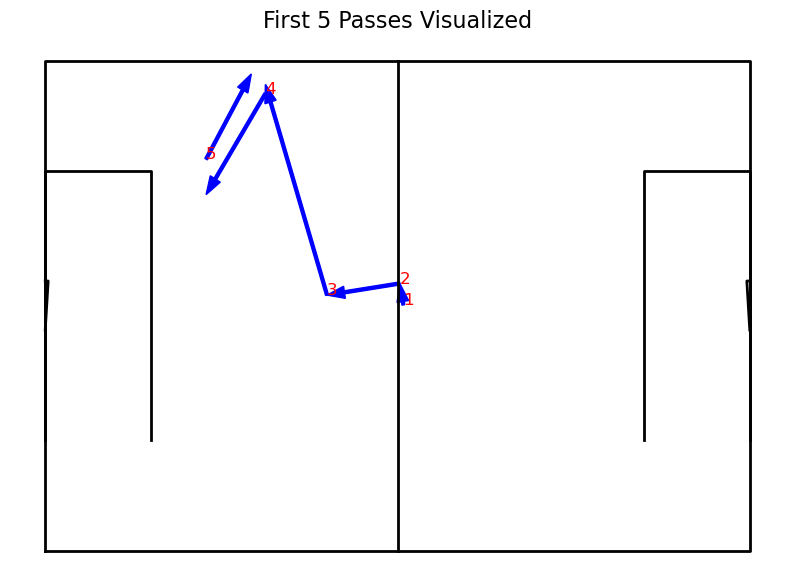

In [154]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrow

# Extract the first 5 passes
passes = all_passes.head(5)

# Define pitch dimensions (StatsBomb uses a 120x80 field)
pitch_length = 120
pitch_width = 80

# Create a function to draw the pitch
def draw_pitch(ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))
    # Pitch outline and center line
    ax.plot([0, 0, pitch_length, pitch_length, 0], [0, pitch_width, pitch_width, 0, 0], color="black", lw=2)
    ax.plot([pitch_length/2, pitch_length/2], [0, pitch_width], color="black", lw=2)

    # Left penalty area
    ax.plot([18, 18, 0, 0], [18, pitch_width - 18, pitch_width - 18, 18], color="black", lw=2)
    # Right penalty area
    ax.plot([pitch_length - 18, pitch_length - 18, pitch_length, pitch_length], 
            [18, pitch_width - 18, pitch_width - 18, 18], color="black", lw=2)

    # Goal posts
    ax.plot([0, 0.5, 0], [36, 44, 44], color="black", lw=2)
    ax.plot([pitch_length, pitch_length - 0.5, pitch_length], 
            [36, 44, 44], color="black", lw=2)

    # Turn off axes
    ax.axis("off")
    return ax

# Plot the passes
fig, ax = plt.subplots(figsize=(10, 7))
draw_pitch(ax)

for i, row in passes.iterrows():
    start_x, start_y = row['location']  # Start coordinates
    end_x, end_y = row['pass_end_location']  # End coordinates
    
    # Draw the pass as an arrow
    ax.add_patch(FancyArrow(start_x, start_y, end_x - start_x, end_y - start_y, 
                            color='blue', width=0.5, head_width=2, length_includes_head=True))
    
    # Add a label for the pass number
    ax.text(start_x, start_y, f"{i+1}", color="red", fontsize=12)

ax.set_title("First 5 Passes Visualized", fontsize=16)
plt.show()


In [156]:
# Key passes, according to opta: A pass that leads to a shot on goal, without a goal being scored

# Filter for key passes
# Count the pass_shot_assist column

key_passes = all_passes['pass_shot_assist'].sum()

key_passes

6506

In [160]:
# Filter for key passes and assists
key_passes_and_assists = all_passes[
    all_passes['pass_shot_assist'].notnull() | all_passes['pass_goal_assist'].notnull()
]

# Drop duplicates
key_passes_and_assists = key_passes_and_assists.drop_duplicates(subset='id', keep='first')

# Count the number of key passes and assists

key_passes_and_assists_count = key_passes_and_assists['id'].nunique()

key_passes_and_assists_count

7175

In [128]:
# Put key passes and assists into csv

key_passes_and_assists.to_csv('key_passes_and_assists.csv', index=False)

In [158]:
# check to see all remaining columns
key_passes_and_assists.columns

Index(['counterpress', 'duration', 'id', 'index', 'location', 'match_id',
       'minute', 'off_camera', 'out', 'pass_aerial_won', 'pass_angle',
       'pass_assisted_shot_id', 'pass_body_part', 'pass_cross',
       'pass_cut_back', 'pass_deflected', 'pass_end_location', 'pass_height',
       'pass_inswinging', 'pass_length', 'pass_outcome', 'pass_outswinging',
       'pass_recipient', 'pass_recipient_id', 'pass_shot_assist',
       'pass_switch', 'pass_technique', 'pass_through_ball', 'pass_type',
       'period', 'play_pattern', 'player', 'player_id', 'position',
       'possession', 'possession_team', 'possession_team_id', 'related_events',
       'second', 'team', 'team_id', 'timestamp', 'type', 'under_pressure',
       'pass_goal_assist', 'pass_straight', 'pass_no_touch',
       'pass_miscommunication', 'formation_x', 'player_name_x',
       'position_id_x', 'position_name_x', 'jersey_number_x'],
      dtype='object')

In [161]:
# for seeing which columns have which type of data (numerical, categorical, etc.), useful for encoding later on
key_passes_and_assists['position']

27             Left Center Midfield
64        Center Defensive Midfield
123                   Left Midfield
165                   Left Midfield
409                  Right Midfield
                    ...            
368403        Right Center Midfield
368429                   Right Wing
368436                   Right Wing
368487               Center Forward
368560                    Left Wing
Name: position, Length: 7175, dtype: object

In [96]:
# separating the meaningful features for clustering into separate df
selected_features = [
    'location',
    'pass_angle', 'pass_body_part', 'pass_deflected', 'pass_end_location', 
    'pass_height', 'pass_length', 'pass_shot_assist', 'pass_technique', 
    'play_pattern', 'position', 'under_pressure', 'pass_goal_assist'
]

df_clustering = key_passes_and_assists[selected_features]

In [97]:
# Making separate coordinate columns for encoding
# Extract x and y coordinates from 'pass_end_location'
df_clustering[['pass_end_x', 'pass_end_y']] = pd.DataFrame(df_clustering['pass_end_location'].to_list(), index=df_clustering.index)

# Extract x and y coordinates from 'location'
df_clustering[['location_x', 'location_y']] = pd.DataFrame(df_clustering['location'].to_list(), index=df_clustering.index)

# Drop the original columns containing the lists if you no longer need them
df_clustering = df_clustering.drop(['pass_end_location', 'location'], axis=1)

# Check the data
df_clustering[['pass_end_x', 'pass_end_y', 'location_x', 'location_y']].head()


/var/folders/4m/2n3yzlf10012wdm94p3176pm0000gn/T/ipykernel_27584/4213599729.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clustering[['pass_end_x', 'pass_end_y']] = pd.DataFrame(df_clustering['pass_end_location'].to_list(), index=df_clustering.index)
/var/folders/4m/2n3yzlf10012wdm94p3176pm0000gn/T/ipykernel_27584/4213599729.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clustering[['pass_end_x', 'pass_end_y']] = pd.DataFrame(df_clustering['pass_end_location'].to_list(), index=df_clustering

,pass_end_x,pass_end_y,location_x,location_y
50,108.1,25.6,93.5,39.3
119,105.3,62.8,63.8,60.1
214,114.3,51.3,86.9,14.5
289,114.3,40.2,119.6,27.8
634,99.3,17.7,64.4,26.3


In [98]:
# another check to see if all rows are either a shot assist or a goal assist
df_clustering[['pass_goal_assist', 'pass_shot_assist']].head()

,pass_goal_assist,pass_shot_assist
50,NaN,True
119,NaN,True
214,NaN,True
289,NaN,True
634,NaN,True


In [129]:
# Putting it in a csv so as to save progress
df_clustering.to_csv('df_clustering.csv', index=False)

In [162]:
df_clustering['pass_deflected'].unique()

array([ 0.,  1., nan])

In [123]:
# encoding pass_length

from sklearn.preprocessing import StandardScaler

# Choose the numeric column for transformation
numeric_col = 'pass_length'
scaler = StandardScaler()

# Reshape the data to fit the scaler and apply the transformation
numeric_transformed = scaler.fit_transform(df_clustering[[numeric_col]])

# Convert the transformed values back to a DataFrame
df_clustering['pass_length_scaled'] = numeric_transformed

# Check the first 5 rows of the transformed column
print("Transformed pass_length (first 5 values):")
print(df_clustering[['pass_length', 'pass_length_scaled']].head())  # Shows original and scaled values
df_clustering.drop(columns=['pass_length'], inplace=True)


Transformed pass_length (first 5 values):
     pass_length  pass_length_scaled
50     20.021238           -0.258571
119    41.587738            1.337984
214    45.880280            1.655758
289    13.485177           -0.742431
634    35.943985            0.920180


In [111]:
# replacing nan values in pass_body_part with 'unknown'

df_clustering['pass_body_part'] = df_clustering['pass_body_part'].fillna('Unknown')


In [ ]:
# encoding pass_body_part

from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Select the categorical column to encode
categorical_col = 'pass_body_part'

# Create the encoder, set to ignore unknown categories during transformation
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Apply one-hot encoding to the selected column
categorical_transformed = encoder.fit_transform(df_clustering[[categorical_col]])

# Convert the result to a DataFrame, with column names as the encoded categories
encoded_df = pd.DataFrame(categorical_transformed, columns=encoder.get_feature_names_out([categorical_col]))

# Concatenate the new encoded columns back into the original DataFrame
df_clustering = pd.concat([df_clustering, encoded_df], axis=1)

# Drop the original column since we now have the encoded features
df_clustering.drop(columns=[categorical_col], inplace=True)

# Check the changes
df_clustering.head()


/Users/megheaiani/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,pass_angle,pass_deflected,pass_height,pass_length,pass_shot_assist,pass_technique,play_pattern,position,under_pressure,pass_goal_assist,...,location_x,location_y,pass_body_part_Drop Kick,pass_body_part_Head,pass_body_part_Keeper Arm,pass_body_part_Left Foot,pass_body_part_No Touch,pass_body_part_Other,pass_body_part_Right Foot,pass_body_part_Unknown
50,-0.753607,0.0,Ground Pass,20.021238,True,NaN,Regular Play,Left Center Midfield,NaN,NaN,...,93.5,39.3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
119,0.064969,0.0,High Pass,41.587738,True,NaN,Regular Play,Center Defensive Midfield,NaN,NaN,...,63.8,60.1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
214,0.930783,0.0,High Pass,45.880280,True,NaN,Regular Play,Left Midfield,NaN,NaN,...,86.9,14.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
289,1.974714,0.0,High Pass,13.485177,True,NaN,From Throw In,Left Midfield,NaN,NaN,...,119.6,27.8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
634,-0.241605,0.0,Ground Pass,35.943985,True,NaN,From Throw In,Right Midfield,NaN,NaN,...,64.4,26.3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [115]:
# encoding pass_angle 

# Handling NaN values if necessary and making sure pass_angle is numeric
df_clustering['pass_angle'] = pd.to_numeric(df_clustering['pass_angle'], errors='coerce')

# Optionally, fill NaN values with the mean (or you can choose a different strategy)
df_clustering['pass_angle'].fillna(df_clustering['pass_angle'].mean(), inplace=True)

# Check the changes
df_clustering['pass_angle'].head()


50    -0.753607
119    0.064969
214    0.930783
289    1.974714
634   -0.241605
Name: pass_angle, dtype: float64

In [117]:
# encoding pass_deflected

# Convert pass_deflected to numeric: True becomes 1, NaN becomes 0 (False)
df_clustering['pass_deflected'] = df_clustering['pass_deflected'].apply(lambda x: 1 if x == True else 0)

# Check the changes
df_clustering['pass_deflected'].head()


50     0
119    0
214    0
289    0
634    0
Name: pass_deflected, dtype: int64

In [ ]:
# encoding start and end locations

from sklearn.preprocessing import StandardScaler

# Select the coordinates columns (assuming 'location_x', 'location_y', 'pass_end_location_x', 'pass_end_location_y' exist)
coordinate_cols = ['location_x', 'location_y', 'pass_end_x', 'pass_end_y']
scaler = StandardScaler()

# Apply scaling to the coordinates
df_clustering[coordinate_cols] = scaler.fit_transform(df_clustering[coordinate_cols])



# Check the updated dataframe
print(df_clustering.head())


     pass_angle  pass_deflected  pass_height pass_shot_assist pass_technique  \
50    -0.753607             0.0  Ground Pass             True            NaN   
119    0.064969             0.0    High Pass             True            NaN   
214    0.930783             0.0    High Pass             True            NaN   
289    1.974714             0.0    High Pass             True            NaN   
634   -0.241605             0.0  Ground Pass             True            NaN   

      play_pattern                   position under_pressure pass_goal_assist  \
50    Regular Play       Left Center Midfield            NaN              NaN   
119   Regular Play  Center Defensive Midfield            NaN              NaN   
214   Regular Play              Left Midfield            NaN              NaN   
289  From Throw In              Left Midfield            NaN              NaN   
634  From Throw In             Right Midfield            NaN              NaN   

     pass_end_x  ...  location_y

In [127]:
# encoding pass_height
from sklearn.preprocessing import OneHotEncoder

# Fill NaN values in the 'pass_height' column with 'Unknown'
df_clustering['pass_height'] = df_clustering['pass_height'].fillna('Unknown')

# Select the 'pass_height' column for transformation
categorical_col = 'pass_height'  # Choose the column
encoder = OneHotEncoder(handle_unknown='ignore')

# Fit and transform the 'pass_height' column
pass_height_transformed = encoder.fit_transform(df_clustering[[categorical_col]])

# Convert the transformed data into a DataFrame with appropriate column names
pass_height_encoded_df = pd.DataFrame(pass_height_transformed.toarray(), columns=encoder.get_feature_names_out([categorical_col]))

# Add the encoded columns to the original DataFrame
df_clustering = pd.concat([df_clustering, pass_height_encoded_df], axis=1)

# Drop the original 'pass_height' column
df_clustering.drop(columns=[categorical_col], inplace=True)

# Check the updated DataFrame
print(df_clustering.head())


     pass_angle  pass_deflected pass_shot_assist pass_technique  \
50    -0.753607             0.0             True            NaN   
119    0.064969             0.0             True            NaN   
214    0.930783             0.0             True            NaN   
289    1.974714             0.0             True            NaN   
634   -0.241605             0.0             True            NaN   

      play_pattern                   position under_pressure pass_goal_assist  \
50    Regular Play       Left Center Midfield            NaN              NaN   
119   Regular Play  Center Defensive Midfield            NaN              NaN   
214   Regular Play              Left Midfield            NaN              NaN   
289  From Throw In              Left Midfield            NaN              NaN   
634  From Throw In             Right Midfield            NaN              NaN   

     pass_end_x  pass_end_y  ...  pass_body_part_Left Foot  \
50     0.611995   -0.984560  ...                

In [167]:
# Fill NaN values in 'pass_technique' with 'Unknown'
df_clustering['pass_technique'] = df_clustering['pass_technique'].fillna('Unknown')

# Initialize the one-hot encoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Fit and transform the 'pass_technique' column
encoded_technique = encoder.fit_transform(df_clustering[['pass_technique']])

# Convert the encoded result into a DataFrame with proper column names
encoded_technique_df = pd.DataFrame(
    encoded_technique,
    columns=[f"pass_technique_{cat}" for cat in encoder.categories_[0]],
    index=df_clustering.index
)

# Add the encoded columns back to the DataFrame
df_clustering = pd.concat([df_clustering, encoded_technique_df], axis=1)

# Remove the original 'pass_technique' column
df_clustering = df_clustering.drop(columns=['pass_technique'])

# Check the updated DataFrame
print(df_clustering.head())

   pass_angle  pass_deflected pass_shot_assist   play_pattern  \
0   -0.753607             0.0             True   Regular Play   
1    0.064969             0.0             True   Regular Play   
2    0.930783             0.0             True   Regular Play   
3    1.974714             0.0             True  From Throw In   
4   -0.241605             0.0             True  From Throw In   

                    position under_pressure pass_goal_assist  pass_end_x  \
0       Left Center Midfield            NaN              NaN    0.611995   
1  Center Defensive Midfield            NaN              NaN    0.385174   
2              Left Midfield            NaN              NaN    1.114241   
3              Left Midfield            NaN              NaN    1.114241   
4             Right Midfield            NaN              NaN   -0.100870   

   pass_end_y  location_x  ...  pass_length_scaled  pass_height_Ground Pass  \
0   -0.984560   -0.073115  ...           -0.258571                      1

/Users/megheaiani/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [170]:
# Fill NaN values in 'play_pattern' with 'Unknown'
df_clustering['play_pattern'] = df_clustering['play_pattern'].fillna('Unknown')

# Initialize the one-hot encoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Fit and transform the 'play_pattern' column
encoded_pattern = encoder.fit_transform(df_clustering[['play_pattern']])

# Convert the encoded result into a DataFrame with proper column names
encoded_pattern_df = pd.DataFrame(
    encoded_pattern,
    columns=[f"play_pattern_{cat}" for cat in encoder.categories_[0]],
    index=df_clustering.index
)

# Add the encoded columns back to the DataFrame
df_clustering = pd.concat([df_clustering, encoded_pattern_df], axis=1)

# Remove the original 'play_pattern' column
df_clustering = df_clustering.drop(columns=['play_pattern'])

# Check the updated DataFrame
print(df_clustering.head())

   pass_angle  pass_deflected pass_shot_assist                   position  \
0   -0.753607             0.0             True       Left Center Midfield   
1    0.064969             0.0             True  Center Defensive Midfield   
2    0.930783             0.0             True              Left Midfield   
3    1.974714             0.0             True              Left Midfield   
4   -0.241605             0.0             True             Right Midfield   

  under_pressure pass_goal_assist  pass_end_x  pass_end_y  location_x  \
0            NaN              NaN    0.611995   -0.984560   -0.073115   
1            NaN              NaN    0.385174    1.728574   -1.618698   
2            NaN              NaN    1.114241    0.889836   -0.416578   
3            NaN              NaN    1.114241    0.080272    1.285124   
4            NaN              NaN   -0.100870   -1.560737   -1.587474   

   location_y  ...  play_pattern_From Corner  play_pattern_From Counter  \
0   -0.042865  ...     

/Users/megheaiani/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [173]:
# Fill NaN values with 0 and convert True to 1
df_clustering['pass_shot_assist'] = df_clustering['pass_shot_assist'].notna().astype(int)

# Check the updated DataFrame
print(df_clustering[['pass_shot_assist']].head())


   pass_shot_assist
0                 1
1                 1
2                 1
3                 1
4                 1


In [178]:
# A lot of duplicated rows, so we will drop them
# Keep only the first 7176 rows
df_clustering = df_clustering.iloc[:7175]

# Check the shape to confirm
print(df_clustering.shape)


(7175, 38)


In [181]:
# pass body part is not encoded for all values, so I will do it again.
# Remove all columns related to pass_body_part from df_clustering
df_clustering = df_clustering.loc[:, ~df_clustering.columns.str.contains('^pass_body_part_')]

# Confirm removal
print("Columns after removing pass_body_part encoding:")
print(df_clustering.columns)


Columns after removing pass_body_part encoding:
Index(['pass_angle', 'pass_deflected', 'pass_shot_assist', 'position',
       'under_pressure', 'pass_goal_assist', 'pass_end_x', 'pass_end_y',
       'location_x', 'location_y', 'pass_length_scaled',
       'pass_height_Ground Pass', 'pass_height_High Pass',
       'pass_height_Low Pass', 'pass_height_Unknown',
       'pass_technique_Inswinging', 'pass_technique_Outswinging',
       'pass_technique_Straight', 'pass_technique_Through Ball',
       'pass_technique_Unknown', 'play_pattern_From Corner',
       'play_pattern_From Counter', 'play_pattern_From Free Kick',
       'play_pattern_From Goal Kick', 'play_pattern_From Keeper',
       'play_pattern_From Kick Off', 'play_pattern_From Throw In',
       'play_pattern_Other', 'play_pattern_Regular Play',
       'play_pattern_Unknown'],
      dtype='object')


In [182]:
# Add the original pass_body_part column from all_passes back into df_clustering
df_clustering['pass_body_part'] = all_passes['pass_body_part']

# Confirm addition
print("Updated df_clustering with original pass_body_part:")
print(df_clustering[['pass_body_part']].head())


Updated df_clustering with original pass_body_part:
  pass_body_part
0     Right Foot
1     Right Foot
2      Left Foot
3     Right Foot
4     Right Foot


In [183]:
# Encode pass_body_part with OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')
pass_body_part_encoded = encoder.fit_transform(df_clustering[['pass_body_part']])

# Convert the encoded sparse matrix to a DataFrame
pass_body_part_encoded_df = pd.DataFrame(
    pass_body_part_encoded.toarray(),
    columns=encoder.get_feature_names_out(['pass_body_part'])
)

# Reset index to align with df_clustering
pass_body_part_encoded_df.reset_index(drop=True, inplace=True)

# Add the encoded columns back into df_clustering
df_clustering = pd.concat([df_clustering, pass_body_part_encoded_df], axis=1)

# Drop the original pass_body_part column
df_clustering.drop(columns=['pass_body_part'], inplace=True)

# Confirm the updated DataFrame
print("Updated df_clustering after re-encoding pass_body_part:")
print(df_clustering.head())

Updated df_clustering after re-encoding pass_body_part:
   pass_angle  pass_deflected  pass_shot_assist                   position  \
0   -0.753607             0.0                 1       Left Center Midfield   
1    0.064969             0.0                 1  Center Defensive Midfield   
2    0.930783             0.0                 1              Left Midfield   
3    1.974714             0.0                 1              Left Midfield   
4   -0.241605             0.0                 1             Right Midfield   

  under_pressure pass_goal_assist  pass_end_x  pass_end_y  location_x  \
0            NaN              NaN    0.611995   -0.984560   -0.073115   
1            NaN              NaN    0.385174    1.728574   -1.618698   
2            NaN              NaN    1.114241    0.889836   -0.416578   
3            NaN              NaN    1.114241    0.080272    1.285124   
4            NaN              NaN   -0.100870   -1.560737   -1.587474   

   location_y  ...  play_pattern_Reg

In [185]:
# same process has to be done for pass_height
# Remove all columns related to pass_height from df_clustering
df_clustering = df_clustering.loc[:, ~df_clustering.columns.str.contains('^pass_height_')]

# Confirm removal
print("Columns after removing pass_height encoding:")
print(df_clustering.columns)


Columns after removing pass_height encoding:
Index(['pass_angle', 'pass_deflected', 'pass_shot_assist', 'position',
       'under_pressure', 'pass_goal_assist', 'pass_end_x', 'pass_end_y',
       'location_x', 'location_y', 'pass_length_scaled',
       'pass_technique_Inswinging', 'pass_technique_Outswinging',
       'pass_technique_Straight', 'pass_technique_Through Ball',
       'pass_technique_Unknown', 'play_pattern_From Corner',
       'play_pattern_From Counter', 'play_pattern_From Free Kick',
       'play_pattern_From Goal Kick', 'play_pattern_From Keeper',
       'play_pattern_From Kick Off', 'play_pattern_From Throw In',
       'play_pattern_Other', 'play_pattern_Regular Play',
       'play_pattern_Unknown', 'pass_body_part_Drop Kick',
       'pass_body_part_Head', 'pass_body_part_Keeper Arm',
       'pass_body_part_Left Foot', 'pass_body_part_No Touch',
       'pass_body_part_Other', 'pass_body_part_Right Foot',
       'pass_body_part_nan'],
      dtype='object')


In [186]:
# Add the original pass_height column from all_passes back into df_clustering
df_clustering['pass_height'] = all_passes['pass_height']

# Confirm addition
print("Updated df_clustering with original pass_height:")
print(df_clustering[['pass_height']].head())


Updated df_clustering with original pass_height:
   pass_height
0  Ground Pass
1  Ground Pass
2  Ground Pass
3  Ground Pass
4  Ground Pass


In [188]:
# encoding pass height as an ordinal feature
from sklearn.preprocessing import OrdinalEncoder

# Define the ordinal order for pass_height
ordinal_categories = [['Ground Pass', 'Low Pass', 'High Pass']]  # Ordered list of categories

# Initialize the OrdinalEncoder with the specified order
ordinal_encoder = OrdinalEncoder(categories=ordinal_categories)

# Encode the pass_height column
df_clustering['pass_height_encoded'] = ordinal_encoder.fit_transform(df_clustering[['pass_height']])

# Drop the original pass_height column
df_clustering.drop(columns=['pass_height'], inplace=True)

# Confirm the results
print("Updated df_clustering with ordinally encoded pass_height:")
print(df_clustering[['pass_height_encoded']].head())


Updated df_clustering with ordinally encoded pass_height:
   pass_height_encoded
0                  0.0
1                  0.0
2                  0.0
3                  0.0
4                  0.0


In [193]:
# encoding position
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
position_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit and transform the position column
position_encoded = position_encoder.fit_transform(df_clustering[['position']])

# Convert the encoded data into a DataFrame
position_encoded_df = pd.DataFrame(
    position_encoded, 
    columns=position_encoder.get_feature_names_out(['position'])
)

# Reset the index of the encoded DataFrame to match df_clustering
position_encoded_df.index = df_clustering.index

# Concatenate the encoded columns back to the main DataFrame
df_clustering = pd.concat([df_clustering, position_encoded_df], axis=1)

# Drop the original position column
df_clustering.drop(columns=['position'], inplace=True)

# Confirm the updated DataFrame
print("Updated df_clustering with one-hot encoded 'position':")
print(df_clustering.head())


Updated df_clustering with one-hot encoded 'position':
   pass_angle  pass_deflected  pass_shot_assist under_pressure  \
0   -0.753607             0.0                 1            NaN   
1    0.064969             0.0                 1            NaN   
2    0.930783             0.0                 1            NaN   
3    1.974714             0.0                 1            NaN   
4   -0.241605             0.0                 1            NaN   

  pass_goal_assist  pass_end_x  pass_end_y  location_x  location_y  \
0              NaN    0.611995   -0.984560   -0.073115   -0.042865   
1              NaN    0.385174    1.728574   -1.618698    0.839154   
2              NaN    1.114241    0.889836   -0.416578   -1.094502   
3              NaN    1.114241    0.080272    1.285124   -0.530519   
4              NaN   -0.100870   -1.560737   -1.587474   -0.594126   

   pass_length_scaled  ...  position_Left Wing Back  \
0           -0.258571  ...                      0.0   
1            1.33

/Users/megheaiani/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [195]:
# Encode the 'under_pressure' column: True -> 1, NaN -> 0
df_clustering['under_pressure'] = df_clustering['under_pressure'].apply(lambda x: 1 if x == True else 0)

# Encode the 'pass_goal_assist' column: True -> 1, NaN -> 0
df_clustering['pass_goal_assist'] = df_clustering['pass_goal_assist'].apply(lambda x: 1 if x == True else 0)

# Check the updated DataFrame to ensure proper encoding
print("Updated df_clustering with encoded 'under_pressure' and 'pass_goal_assist':")
print(df_clustering[['under_pressure', 'pass_goal_assist']].head())


Updated df_clustering with encoded 'under_pressure' and 'pass_goal_assist':
   under_pressure  pass_goal_assist
0               0                 0
1               0                 0
2               0                 0
3               0                 0
4               0                 0


In [199]:
# finally, put it all in the csv again to visualize encoded features
df_clustering.to_csv('df_clustering.csv', index=False)

In [230]:
from sklearn.metrics.pairwise import cosine_distances
from scipy.spatial.distance import squareform

# Compute cosine similarity
cosine_dist = cosine_distances(df_clustering)

# Check the cosine distance
print(f"Cosine distance matrix shape: {cosine_dist.shape}")


Cosine distance matrix shape: (7175, 7175)


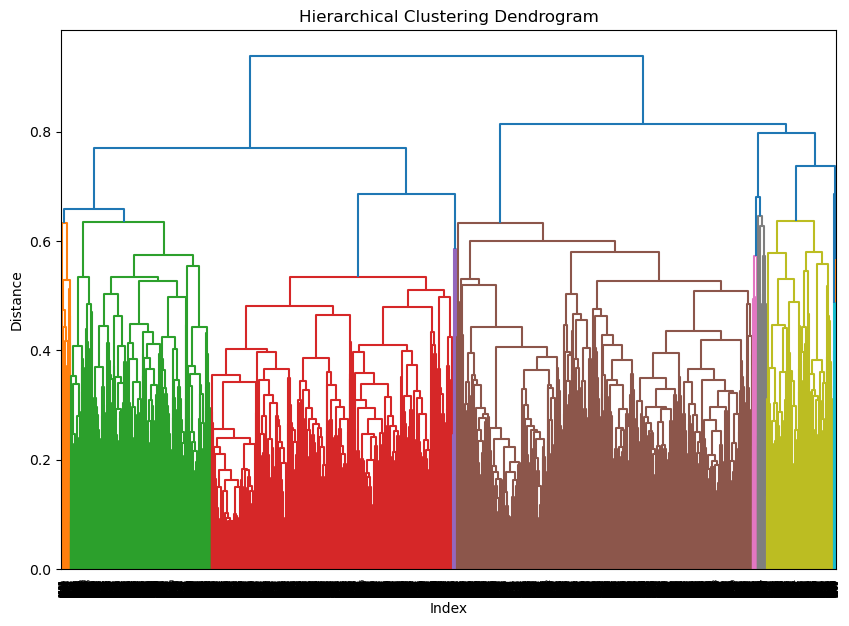

In [217]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Perform hierarchical/agglomerative clustering using the cosine distance
linked = sch.linkage(squareform(cosine_dist), method='average')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()


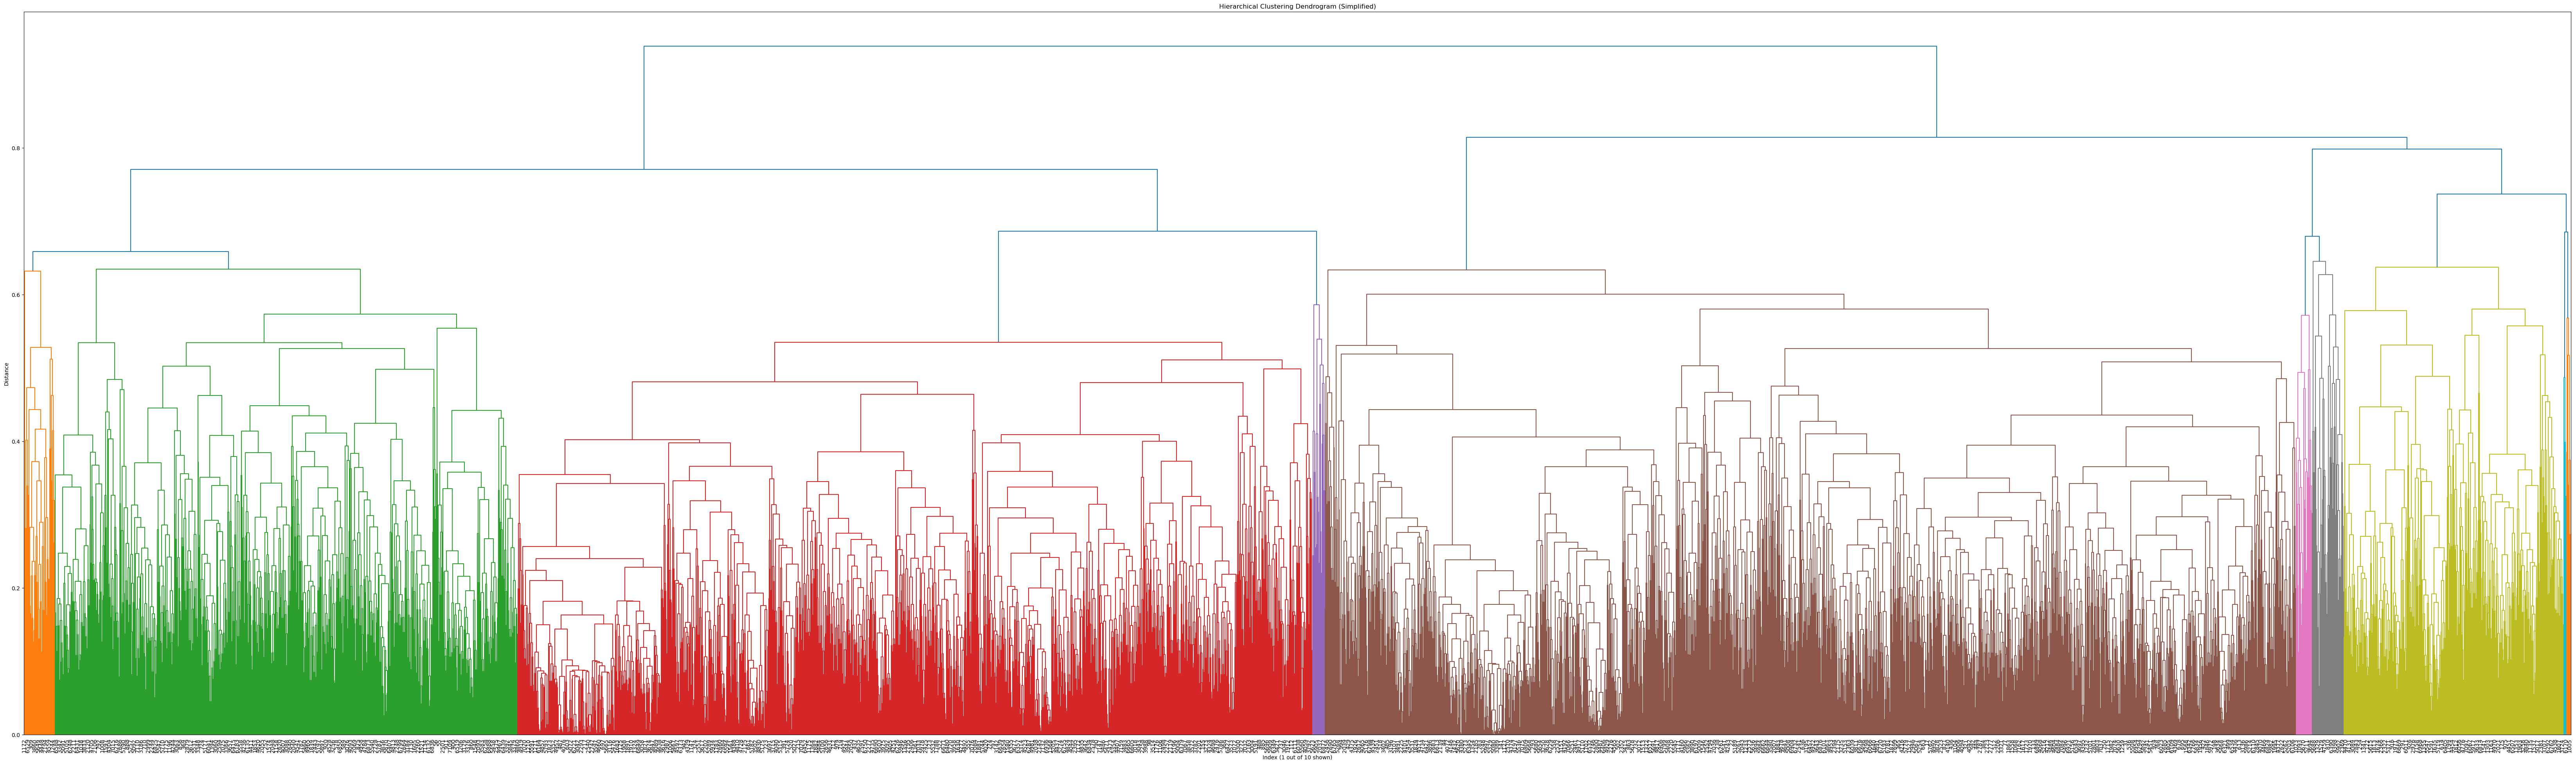

In [223]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import numpy as np

# Perform hierarchical/agglomerative clustering using the cosine distance
linked = sch.linkage(squareform(cosine_dist), method='average')

# Create the dendrogram
plt.figure(figsize=(84,24))  # Wider figure for better readability
dendrogram = sch.dendrogram(linked, leaf_font_size=10)

# Reduce label density by showing 1 out of every 10 labels
ax = plt.gca()
x_labels = ax.get_xaxis().get_ticklabels()
for i, label in enumerate(x_labels):
    if i % 10 != 0:  # Hide labels not divisible by 10
        label.set_visible(False)

# Add title and axis labels
plt.title('Hierarchical Clustering Dendrogram (Simplified)')
plt.xlabel('Index (1 out of 10 shown)')
plt.ylabel('Distance')
plt.show()


In [226]:
# Create a new dataframe with only passes that are goal assists
df_goal_assists = df_clustering[df_clustering['pass_goal_assist'] == 1].copy()
df_goal_assists

,pass_angle,pass_deflected,pass_shot_assist,under_pressure,pass_goal_assist,pass_end_x,pass_end_y,location_x,location_y,pass_length_scaled,...,position_Left Wing Back,position_Right Attacking Midfield,position_Right Back,position_Right Center Back,position_Right Center Forward,position_Right Center Midfield,position_Right Defensive Midfield,position_Right Midfield,position_Right Wing,position_Right Wing Back
37,1.784679,0.0,0,0,1,0.757808,0.547048,1.305940,-1.705131,1.781901,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41,-1.419824,0.0,0,0,1,0.393275,-1.174188,0.155860,1.356492,1.950909,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47,1.275127,0.0,0,1,1,-0.149475,-0.488611,-0.078319,-1.073300,-0.394189,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48,-1.168926,0.0,0,1,1,0.782110,-0.320864,0.619014,0.101312,-1.097228,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
62,-1.570796,0.0,0,0,1,0.611995,-0.634479,0.686666,0.008021,-0.993034,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7020,-1.838302,0.0,0,0,1,0.976528,1.013823,1.305940,1.683009,0.331775,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7038,1.012197,0.0,0,1,1,1.494976,0.277193,1.019721,-0.195522,-1.112178,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7079,1.166617,0.0,0,0,1,1.357263,0.226139,0.410855,-1.357412,0.988796,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7128,-0.585759,0.0,0,0,1,0.474282,0.029218,-1.009832,0.834914,1.004412,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [229]:
from sklearn.metrics.pairwise import cosine_distances

# Compute cosine similarity
cosine_dist_assists = cosine_distances(df_goal_assists)

# Check the cosine distance
print(f"Cosine distance matrix shape: {cosine_dist_assists.shape}")

Cosine distance matrix shape: (669, 669)


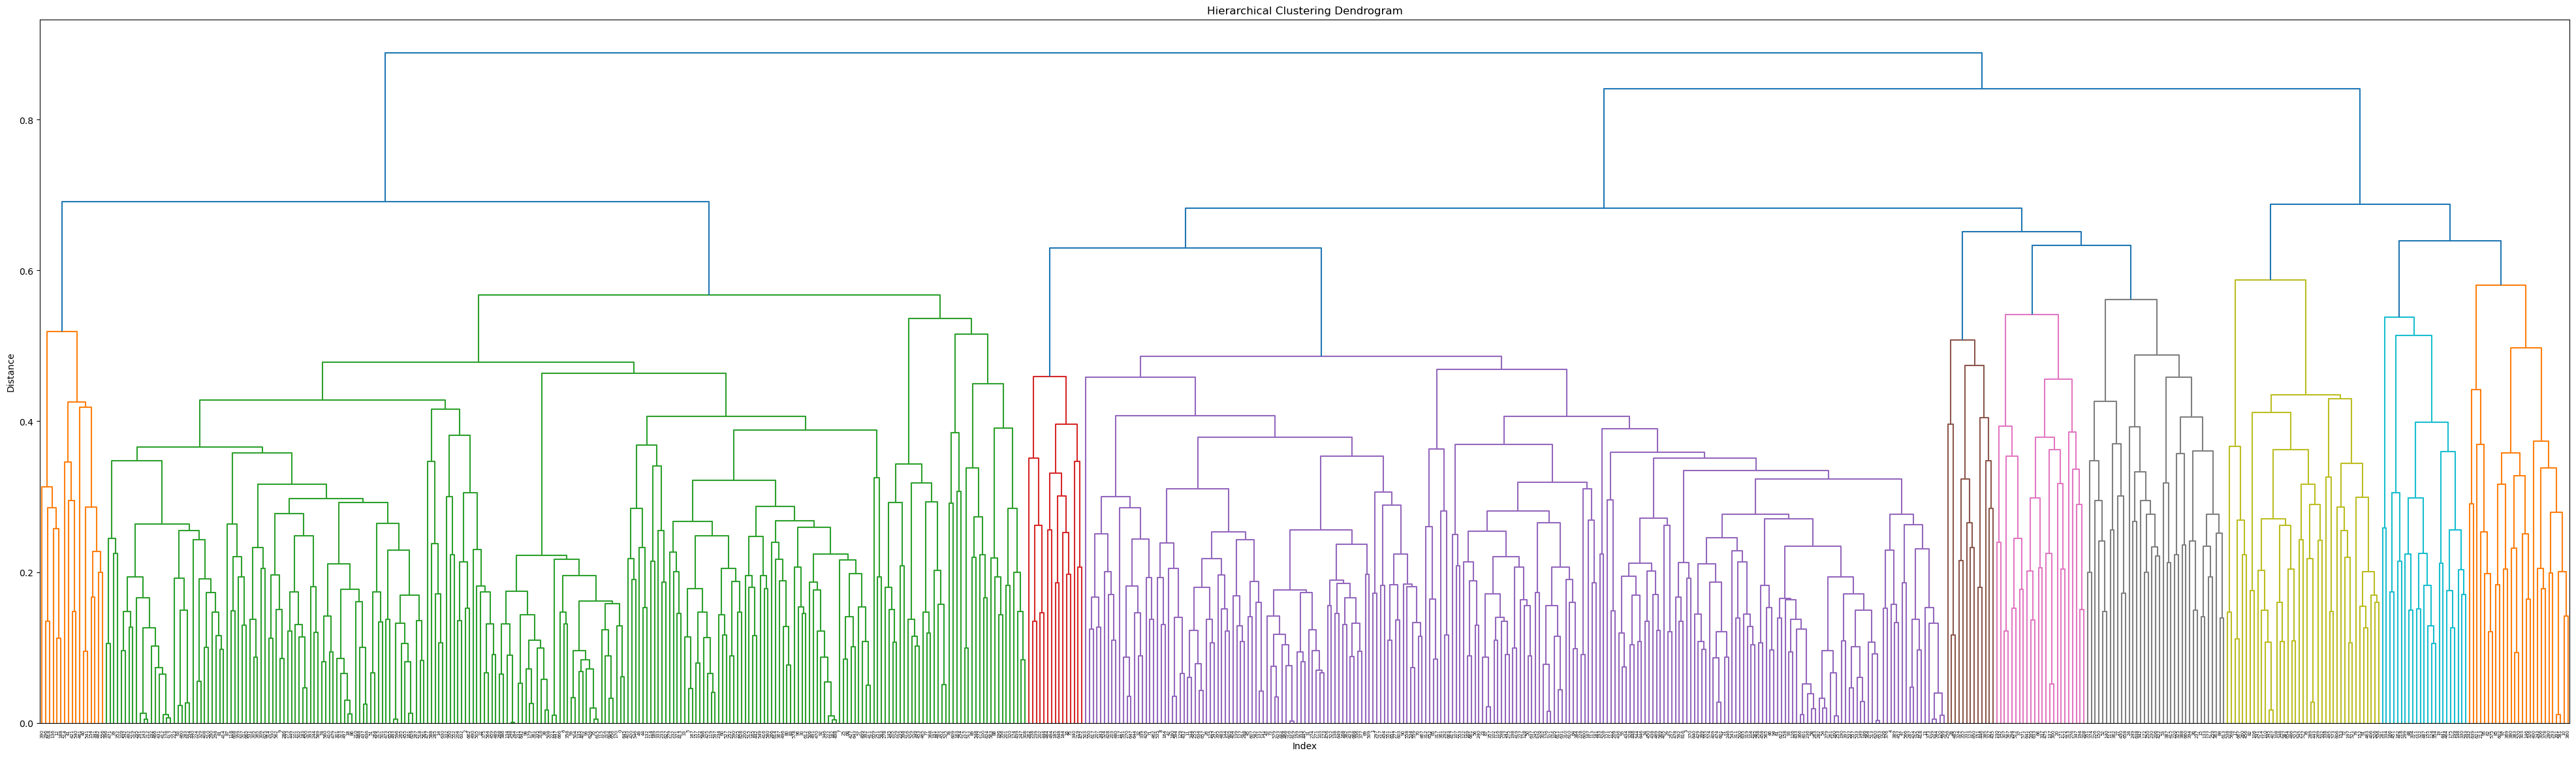

In [248]:
# same process but only for assists, much more feasible for me to analyze and label the clusters
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Perform hierarchical/agglomerative clustering using the cosine distance
linked = sch.linkage(squareform(cosine_dist_assists), method='average')

# Plot the dendrogram
plt.figure(figsize=(50, 14))
sch.dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

In [242]:
from scipy.cluster.hierarchy import fcluster

# Define the threshold (adjust this based on the dendrogram)
threshold = 0.5 * max(linked[:, 2])  # Example: Cut at 50% of max distance

# Generate cluster labels
df_goal_assists['cluster'] = fcluster(linked, threshold, criterion='distance')

# Count the number of unique clusters
num_clusters = df_goal_assists['cluster'].nunique()
print(f"Number of clusters: {num_clusters}")


Number of clusters: 33


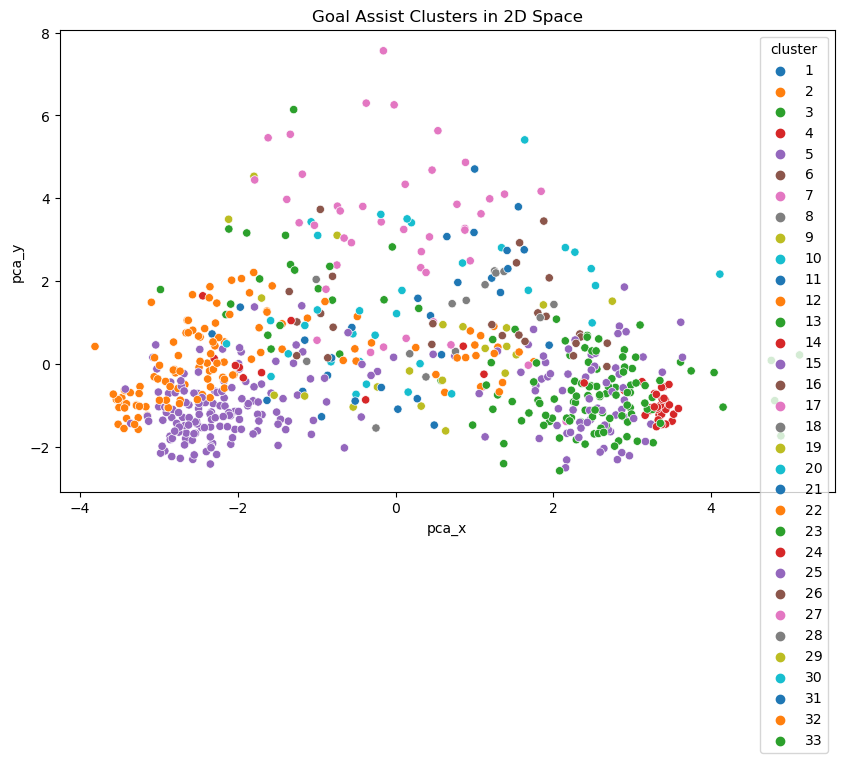

In [243]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
df_goal_assists['pca_x'], df_goal_assists['pca_y'] = zip(*pca.fit_transform(df_goal_assists.drop(columns=['cluster'])))

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_goal_assists, x='pca_x', y='pca_y', hue='cluster', palette='tab10')
plt.title('Goal Assist Clusters in 2D Space')
plt.show()


In [244]:
df_goal_assists['cluster'].value_counts().sort_index()


1       6
2      11
3     104
4      34
5      68
6      17
7       4
8       7
9      10
10      5
11     10
12     89
13      1
14      7
15    131
16      3
17      5
18      5
19      8
20     11
21      5
22     11
23      9
24      3
25     14
26      6
27     35
28      2
29      4
30     17
31      7
32     10
33     10
Name: cluster, dtype: int64

In [256]:
# load
df_key_passes_and_assists = pd.read_csv('key_passes_and_assists.csv')
df_assists = df_key_passes_and_assists[df_key_passes_and_assists['pass_goal_assist'].notnull()]
df_assists.to_csv('df_assists_for_analysis.csv', index=False)

In [265]:
# analyze the clusters in df_goal_assists using the original df_assists data that is not encoded, first save this so we have both csv files
df_goal_assists.to_csv('df_assists_clustered_and_encoded.csv', index=False)
df_assists

,counterpress,duration,id,index,location,match_id,minute,off_camera,out,pass_aerial_won,...,under_pressure,pass_goal_assist,pass_straight,pass_no_touch,pass_miscommunication,formation,position_id,position_name,jersey_number,cluster
37,NaN,2.117364,252cf15d-6bc6-4337-a52b-a72983cb36a3,1365,"[120.0, 0.1]",3754136,37,NaN,NaN,NaN,...,NaN,True,True,NaN,NaN,4231.0,19.0,Center Attacking Midfield,10.0,4
41,NaN,2.459934,116f66bf-14c3-40ee-831d-0724b96af967,2232,"[97.9, 72.3]",3754136,60,NaN,NaN,NaN,...,NaN,True,NaN,NaN,NaN,41212.0,19.0,Center Attacking Midfield,17.0,12
47,NaN,0.736530,5031237e-180b-4055-ac97-8e54d6a1891f,325,"[93.4, 15.0]",3754037,6,NaN,NaN,NaN,...,True,True,NaN,NaN,NaN,4231.0,19.0,Center Attacking Midfield,20.0,3
48,NaN,0.392860,a0bf6147-a4ce-45a1-b30b-c444d579bac6,401,"[106.8, 42.7]",3754037,8,NaN,NaN,NaN,...,True,True,NaN,NaN,NaN,442.0,22.0,Right Center Forward,7.0,15
62,NaN,1.174332,22205493-9afb-4b94-be28-7edbf10af411,2616,"[108.1, 40.5]",3754037,63,NaN,NaN,NaN,...,NaN,True,NaN,NaN,NaN,4231.0,21.0,Left Wing,15.0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7020,NaN,1.097302,caac67db-0f0c-4ad1-8398-71be3f99930c,287,"[120.0, 80.0]",3754349,6,NaN,NaN,NaN,...,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
7038,NaN,1.354110,784b626f-0a37-43fa-97f0-a6af4feb7d7f,506,"[114.5, 35.7]",3754350,13,NaN,NaN,True,...,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
7079,NaN,1.959458,b44dcd1e-a17c-4609-b821-a3331be69208,938,"[102.8, 8.3]",3754020,25,NaN,NaN,NaN,...,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
7128,NaN,1.511422,b3006504-847c-49b5-8552-b11498e2240d,1447,"[75.5, 60.0]",3754141,42,NaN,NaN,NaN,...,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26


In [261]:
# put the clusters onto the df with the decoded data
df_assists['cluster'] = df_goal_assists['cluster']

/var/folders/4m/2n3yzlf10012wdm94p3176pm0000gn/T/ipykernel_27584/4095666123.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_assists['cluster'] = df_goal_assists['cluster']


In [266]:
# save it as a csv
df_assists.to_csv('df_assists_for_analysis.csv', index=False)

In [270]:
df_assists.groupby('cluster')[['pass_length', 'pass_angle']].mean()


,pass_length,pass_angle
cluster,,
1,35.672193,0.280078
2,16.735699,0.245382
3,17.817335,1.614924
4,39.044222,1.698472
5,21.981593,1.451568
6,38.881623,0.866093
7,20.730105,0.833016
8,36.094707,0.903748
9,19.383905,1.172731


In [275]:
from scipy.cluster.hierarchy import fcluster

num_clusters = 33
cluster_assignments = fcluster(linked, num_clusters, criterion='maxclust')
cutoff_height = linked[-num_clusters, 2] # Approximate cutoff height
cutoff_height


0.4418315035182516

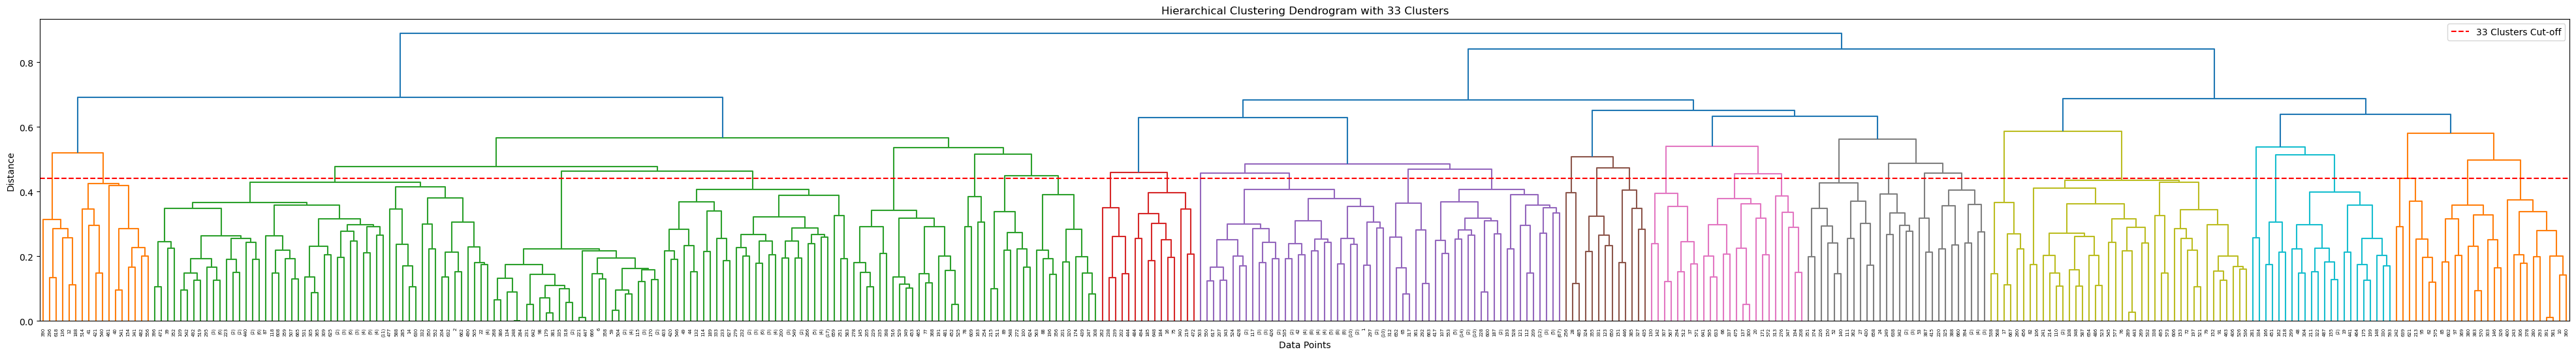

In [281]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

plt.figure(figsize=(50, 6))

# Plot the dendrogram
sch.dendrogram(linked, truncate_mode="level", p=10)  # Truncate for readability

# Add a horizontal line at the cut-off threshold in order to visualize the number of clusters
plt.axhline(y=cutoff_height, color='r', linestyle='--', label="33 Clusters Cut-off")

plt.title('Hierarchical Clustering Dendrogram with 33 Clusters')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.legend()
plt.show()


In [290]:
# print cluster information in order so as to start analyzing
import scipy.cluster.hierarchy as sch
import numpy as np
from collections import defaultdict

# Generate cluster labels using the same cutoff height from dendrogram
cluster_labels = sch.fcluster(linked, cutoff_height, criterion='distance')

# Create a dictionary to store cluster indices
clusters = defaultdict(list)
for index, cluster_id in enumerate(cluster_labels):
    clusters[cluster_id].append(index)
clusters_sorted = sorted(clusters.items(), key=lambda x: len(x[1]))
# Print cluster information
for cluster_id, indices in clusters_sorted:
    print(f"Cluster {cluster_id}: {indices}")


Cluster 13: [503]
Cluster 28: [281, 334]
Cluster 16: [28, 256, 485]
Cluster 24: [53, 387, 415]
Cluster 7: [78, 163, 254, 609]
Cluster 29: [162, 166, 218, 451]
Cluster 17: [123, 324, 331, 355, 650]
Cluster 18: [151, 327, 385, 435, 446]
Cluster 21: [194, 208, 276, 313, 347]
Cluster 10: [202, 238, 239, 262, 444]
Cluster 1: [12, 136, 188, 296, 390, 618]
Cluster 26: [17, 260, 456, 538, 568, 667]
Cluster 31: [62, 95, 213, 242, 575, 621, 639]
Cluster 14: [65, 292, 312, 317, 361, 652, 663]
Cluster 8: [89, 100, 215, 272, 511, 548, 624]
Cluster 19: [37, 130, 142, 294, 307, 512, 567, 571]
Cluster 23: [24, 172, 206, 230, 249, 250, 342, 422, 638]
Cluster 33: [10, 243, 280, 293, 306, 360, 378, 391, 400, 581]
Cluster 11: [16, 75, 184, 185, 219, 340, 472, 484, 494, 648]
Cluster 32: [85, 97, 146, 303, 326, 369, 380, 383, 570, 602]
Cluster 9: [88, 174, 196, 201, 247, 308, 320, 356, 439, 563]
Cluster 20: [20, 66, 137, 171, 300, 337, 475, 572, 595, 633, 641]
Cluster 22: [27, 52, 111, 140, 150, 226, 351, 3

In [311]:
# indices in the clusters are the row indices in the dataframe + 2 (first row in the df is feature titles and the cluster indices start from 0 whilst the row indices start from 1)
# analyzing cluster 15 (big to small)

df_assists_for_analysis = pd.read_csv('df_assists_for_analysis.csv')



# Filter dataset for Cluster 15
df_cluster_15 = df_assists_for_analysis[df_assists_for_analysis["cluster"] == 15]

# Compute statistics
analysis = {
    "Average Pass Length": df_cluster_15["pass_length"].mean(),
    "Most Common Position Name": df_cluster_15["position_name"].mode()[0] if not df_cluster_15["position_name"].isna().all() else None,
    "Average End Position X": df_cluster_15["pass_end_location"].apply(lambda x: eval(x)[0] if isinstance(x, str) else None).mean(),
    "Average End Position Y": df_cluster_15["pass_end_location"].apply(lambda x: eval(x)[1] if isinstance(x, str) else None).mean(),
    "Average Timestamp": df_cluster_15["minute"].mean(),
    "Total Passes": len(df_cluster_15),
    "Percentage Under Pressure": df_cluster_15["under_pressure"].isna().mean(),
    "Pass height distribution": df_cluster_15["pass_height"].value_counts(normalize=True),
    "Pass body part distribution": df_cluster_15["pass_body_part"].value_counts(normalize=True),
    "Play pattern distribution": df_cluster_15["play_pattern"].value_counts(normalize=True),
    "Pass through ball?": df_cluster_15["pass_through_ball"].unique(),
    "Pass switch?": df_cluster_15['pass_switch'].unique()
}

# Print the results
for key, value in analysis.items():
    print(f"{key}: {value}")




Average Pass Length: 16.470051519083967
Most Common Position Name: Left Wing
Average End Position X: 109.74732824427481
Average End Position Y: 38.88396946564885
Average Timestamp: 51.25954198473283
Total Passes: 131
Percentage Under Pressure: 0.8015267175572519
Pass height distribution: Ground Pass    0.534351
High Pass      0.244275
Low Pass       0.221374
Name: pass_height, dtype: float64
Pass body part distribution: Right Foot    0.798387
Left Foot     0.169355
Head          0.016129
No Touch      0.008065
Other         0.008065
Name: pass_body_part, dtype: float64
Play pattern distribution: Regular Play      0.465649
From Throw In     0.183206
From Free Kick    0.106870
From Corner       0.083969
From Goal Kick    0.061069
From Counter      0.061069
From Kick Off     0.022901
From Keeper       0.015267
Name: play_pattern, dtype: float64
Pass through ball?: [nan]
Pass switch?: [nan]


/var/folders/4m/2n3yzlf10012wdm94p3176pm0000gn/T/ipykernel_27584/1102951448.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster_15["start_x"] = df_cluster_15["location"].apply(lambda x: eval(x)[0] if isinstance(x, str) else None)
/var/folders/4m/2n3yzlf10012wdm94p3176pm0000gn/T/ipykernel_27584/1102951448.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster_15["start_y"] = df_cluster_15["location"].apply(lambda x: eval(x)[1] if isinstance(x, str) else None)
/var/folders/4m/2n3yzlf10012wd

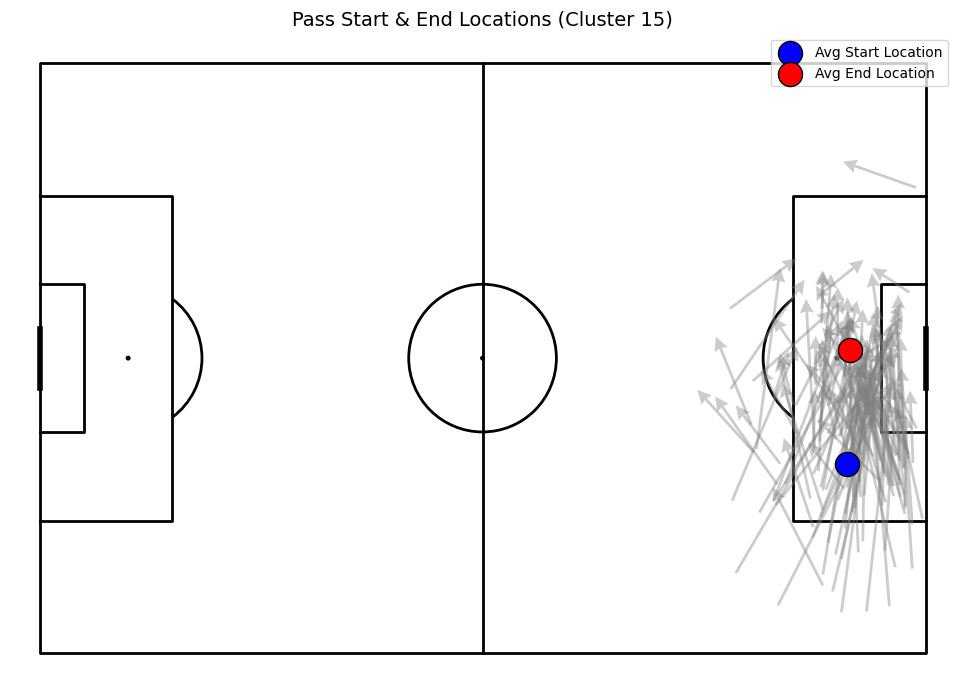

In [312]:

from mplsoccer import Pitch  # For football pitch drawing


# Extract X, Y coordinates for start and end locations
df_cluster_15["start_x"] = df_cluster_15["location"].apply(lambda x: eval(x)[0] if isinstance(x, str) else None)
df_cluster_15["start_y"] = df_cluster_15["location"].apply(lambda x: eval(x)[1] if isinstance(x, str) else None)
df_cluster_15["end_x"] = df_cluster_15["pass_end_location"].apply(lambda x: eval(x)[0] if isinstance(x, str) else None)
df_cluster_15["end_y"] = df_cluster_15["pass_end_location"].apply(lambda x: eval(x)[1] if isinstance(x, str) else None)

# Compute average locations
avg_start_x, avg_start_y = df_cluster_15["start_x"].mean(), df_cluster_15["start_y"].mean()
avg_end_x, avg_end_y = df_cluster_15["end_x"].mean(), df_cluster_15["end_y"].mean()

pitch = Pitch(pitch_type='statsbomb', line_color='black')  # Use StatsBomb pitch dimensions
fig, ax = pitch.draw(figsize=(10, 7))  # Create pitch

# Plot all passes (start -> end)
for _, row in df_cluster_15.iterrows():
    pitch.arrows(row["start_x"], row["start_y"], row["end_x"], row["end_y"], 
                 ax=ax, color="gray", alpha=0.4, width=2, headwidth=5)

# Highlight average start & end locations
pitch.scatter(avg_start_x, avg_start_y, s=300, color="blue", edgecolors="black", label="Avg Start Location", ax=ax)
pitch.scatter(avg_end_x, avg_end_y, s=300, color="red", edgecolors="black", label="Avg End Location", ax=ax)

plt.title("Pass Start & End Locations (Cluster 15)", fontsize=14)
plt.legend()
plt.show()




Analysis for Cluster 15: Short pass in final third (15 meters), mostly ground passes with the right foot. No through balls or switches, so no players bypassed by the pass. Pass from right to left flank.

In [317]:
# cluster 3
f_assists_for_analysis = pd.read_csv('df_assists_for_analysis.csv')



# Filter dataset for Cluster 3
df_cluster_3 = df_assists_for_analysis[df_assists_for_analysis["cluster"] == 3]

# Compute statistics
analysis = {
    "Average Pass Length": df_cluster_3["pass_length"].mean(),
    "Most Common Position Name": df_cluster_3["position_name"].mode()[0] if not df_cluster_3["position_name"].isna().all() else None,
    "Average End Position X": df_cluster_3["pass_end_location"].apply(lambda x: eval(x)[0] if isinstance(x, str) else None).mean(),
    "Average End Position Y": df_cluster_3["pass_end_location"].apply(lambda x: eval(x)[1] if isinstance(x, str) else None).mean(),
    "Average Timestamp": df_cluster_3["minute"].mean(),
    "Total Passes": len(df_cluster_3),
    "Percentage Under Pressure": df_cluster_3["under_pressure"].isna().mean(),
    "Pass height distribution": df_cluster_3["pass_height"].value_counts(normalize=True),
    "Pass body part distribution": df_cluster_3["pass_body_part"].value_counts(normalize=True),
    "Play pattern distribution": df_cluster_3["play_pattern"].value_counts(normalize=True),
    "Pass through ball?": df_cluster_3["pass_through_ball"].unique(),
    "Pass switch?": df_cluster_3['pass_switch'].unique()
    
}

# Print the results
for key, value in analysis.items():
    print(f"{key}: {value}")


Average Pass Length: 17.81733485192308
Most Common Position Name: Center Attacking Midfield
Average End Position X: 106.63942307692308
Average End Position Y: 37.46634615384615
Average Timestamp: 48.14423076923077
Total Passes: 104
Percentage Under Pressure: 0.7884615384615384
Pass height distribution: Ground Pass    0.509615
High Pass      0.288462
Low Pass       0.201923
Name: pass_height, dtype: float64
Pass body part distribution: Left Foot     0.454545
Right Foot    0.434343
Head          0.080808
Other         0.020202
No Touch      0.010101
Name: pass_body_part, dtype: float64
Play pattern distribution: Regular Play      0.490385
From Throw In     0.211538
From Free Kick    0.153846
From Corner       0.076923
From Goal Kick    0.038462
From Counter      0.019231
From Kick Off     0.009615
Name: play_pattern, dtype: float64
Pass through ball?: [nan]
Pass switch?: [nan True]


/var/folders/4m/2n3yzlf10012wdm94p3176pm0000gn/T/ipykernel_27584/3324890904.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster_3["start_x"] = df_cluster_3["location"].apply(lambda x: eval(x)[0] if isinstance(x, str) else None)
/var/folders/4m/2n3yzlf10012wdm94p3176pm0000gn/T/ipykernel_27584/3324890904.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster_3["start_y"] = df_cluster_3["location"].apply(lambda x: eval(x)[1] if isinstance(x, str) else None)
/var/folders/4m/2n3yzlf10012wdm94p

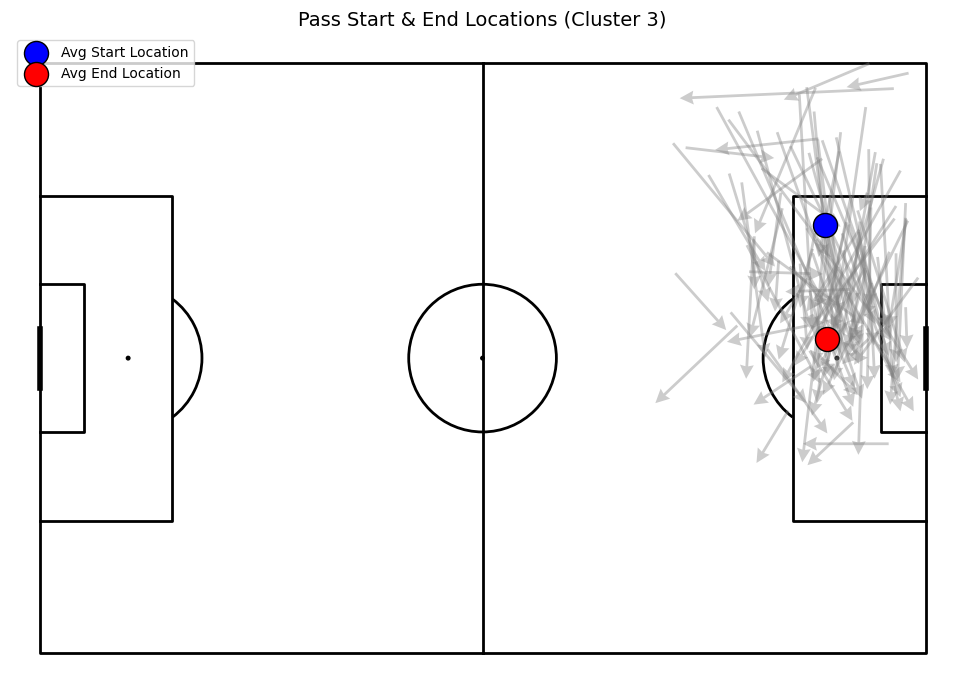

In [ ]:

from mplsoccer import Pitch  # For football pitch drawing


# Extract X, Y coordinates for start and end locations
df_cluster_3["start_x"] = df_cluster_3["location"].apply(lambda x: eval(x)[0] if isinstance(x, str) else None)
df_cluster_3["start_y"] = df_cluster_3["location"].apply(lambda x: eval(x)[1] if isinstance(x, str) else None)
df_cluster_3["end_x"] = df_cluster_3["pass_end_location"].apply(lambda x: eval(x)[0] if isinstance(x, str) else None)
df_cluster_3["end_y"] = df_cluster_3["pass_end_location"].apply(lambda x: eval(x)[1] if isinstance(x, str) else None)

# Compute average locations
avg_start_x, avg_start_y = df_cluster_3["start_x"].mean(), df_cluster_3["start_y"].mean()
avg_end_x, avg_end_y = df_cluster_3["end_x"].mean(), df_cluster_3["end_y"].mean()

pitch = Pitch(pitch_type='statsbomb', line_color='black')  # Use StatsBomb pitch dimensions
fig, ax = pitch.draw(figsize=(10, 7))  # Create pitch

# Plot all passes (start -> end)
for _, row in df_cluster_3.iterrows():
    pitch.arrows(row["start_x"], row["start_y"], row["end_x"], row["end_y"], 
                 ax=ax, color="gray", alpha=0.4, width=2, headwidth=5)

# Highlight average start & end locations
pitch.scatter(avg_start_x, avg_start_y, s=300, color="blue", edgecolors="black", label="Avg Start Location", ax=ax)
pitch.scatter(avg_end_x, avg_end_y, s=300, color="red", edgecolors="black", label="Avg End Location", ax=ax)

plt.title("Pass Start & End Locations (Cluster 3)", fontsize=14)
plt.legend()
plt.show()




Cluster 3: same as cluster 15, only mirrored: short passes in the final third, mostly ground passes, with 1/100 being a switch, but average pass length o0f 17 meters. Passes from LW, with both left and right foot.

In [ ]:
# analysis cluster 12
f_assists_for_analysis = pd.read_csv('df_assists_for_analysis.csv')



# Filter dataset for Cluster 12
df_cluster_12 = df_assists_for_analysis[df_assists_for_analysis["cluster"] == 12]

# Compute statistics
analysis = {
    "Average Pass Length": df_cluster_12["pass_length"].mean(),
    "Most Common Position Name": df_cluster_12["position_name"].mode()[0] if not df_cluster_12["position_name"].isna().all() else None,
    "Average End Position X": df_cluster_12["pass_end_location"].apply(lambda x: eval(x)[0] if isinstance(x, str) else None).mean(),
    "Average End Position Y": df_cluster_12["pass_end_location"].apply(lambda x: eval(x)[1] if isinstance(x, str) else None).mean(),
    "Average Timestamp": df_cluster_12["minute"].mean(),
    "Total Passes": len(df_cluster_12),
    "Percentage Under Pressure": df_cluster_12["under_pressure"].isna().mean(),
    "Pass height distribution": df_cluster_12["pass_height"].value_counts(normalize=True),
    "Pass body part distribution": df_cluster_12["pass_body_part"].value_counts(normalize=True),
    "Play pattern distribution": df_cluster_12["play_pattern"].value_counts(normalize=True),
    "Pass through ball?": df_cluster_12["pass_through_ball"].value_counts(),
    "Pass switch?": df_cluster_12['pass_switch'].value_counts(),
    "Pass cross?": df_cluster_12['pass_cross'].value_counts(),
    "crosses and switches": len(df_cluster_12[(df_cluster_12["pass_cross"] == True) & (df_cluster_12["pass_switch"] == True)])
    
}

# Print the results
for key, value in analysis.items():
    print(f"{key}: {value}")


Average Pass Length: 36.56169770786517
Most Common Position Name: Center Attacking Midfield
Average End Position X: 111.1685393258427
Average End Position Y: 38.73820224719101
Average Timestamp: 50.258426966292134
Total Passes: 89
Percentage Under Pressure: 0.9438202247191011
Pass height distribution: High Pass      0.853933
Ground Pass    0.078652
Low Pass       0.067416
Name: pass_height, dtype: float64
Pass body part distribution: Right Foot    0.715909
Left Foot     0.284091
Name: pass_body_part, dtype: float64
Play pattern distribution: From Corner       0.359551
From Throw In     0.202247
Regular Play      0.202247
From Free Kick    0.191011
From Goal Kick    0.033708
From Kick Off     0.011236
Name: play_pattern, dtype: float64
Pass through ball?: True    6
Name: pass_through_ball, dtype: int64
Pass switch?: True    14
Name: pass_switch, dtype: int64
Pass cross?: True    51
Name: pass_cross, dtype: int64
crosses and switches: 5


/var/folders/4m/2n3yzlf10012wdm94p3176pm0000gn/T/ipykernel_27584/2168547492.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster_12["start_x"] = df_cluster_12["location"].apply(lambda x: eval(x)[0] if isinstance(x, str) else None)
/var/folders/4m/2n3yzlf10012wdm94p3176pm0000gn/T/ipykernel_27584/2168547492.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster_12["start_y"] = df_cluster_12["location"].apply(lambda x: eval(x)[1] if isinstance(x, str) else None)
/var/folders/4m/2n3yzlf10012wd

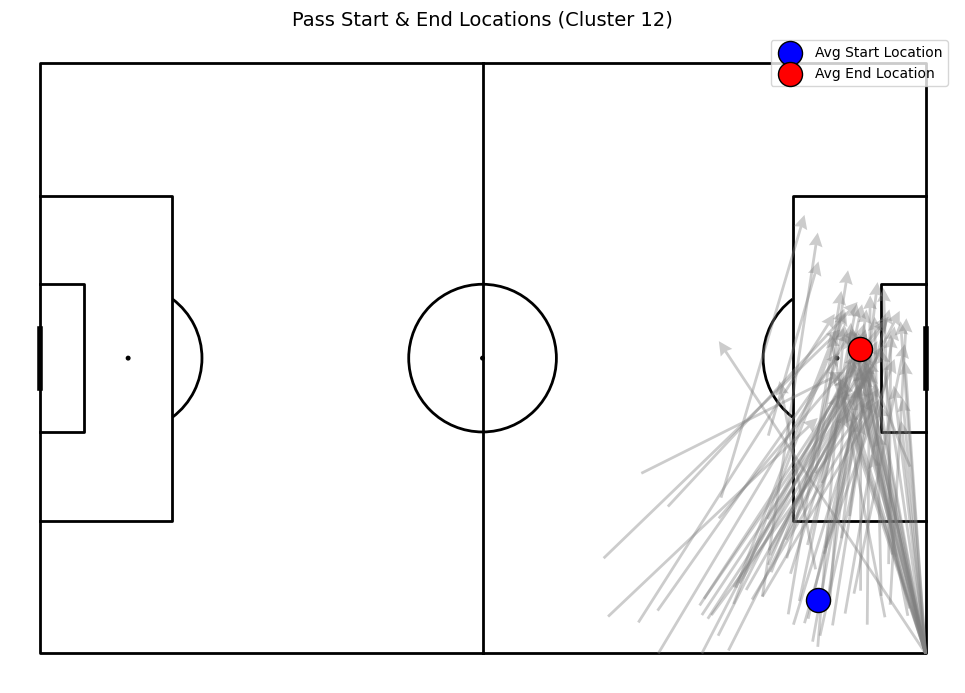

In [ ]:

from mplsoccer import Pitch  # For football pitch drawing


# Extract X, Y coordinates for start and end locations
df_cluster_12["start_x"] = df_cluster_12["location"].apply(lambda x: eval(x)[0] if isinstance(x, str) else None)
df_cluster_12["start_y"] = df_cluster_12["location"].apply(lambda x: eval(x)[1] if isinstance(x, str) else None)
df_cluster_12["end_x"] = df_cluster_12["pass_end_location"].apply(lambda x: eval(x)[0] if isinstance(x, str) else None)
df_cluster_12["end_y"] = df_cluster_12["pass_end_location"].apply(lambda x: eval(x)[1] if isinstance(x, str) else None)

# Compute average locations
avg_start_x, avg_start_y = df_cluster_12["start_x"].mean(), df_cluster_12["start_y"].mean()
avg_end_x, avg_end_y = df_cluster_12["end_x"].mean(), df_cluster_12["end_y"].mean()

pitch = Pitch(pitch_type='statsbomb', line_color='black')  # Use StatsBomb pitch dimensions
fig, ax = pitch.draw(figsize=(10, 7))  # Create pitch

# Plot all passes (start -> end)
for _, row in df_cluster_12.iterrows():
    pitch.arrows(row["start_x"], row["start_y"], row["end_x"], row["end_y"], 
                 ax=ax, color="gray", alpha=0.4, width=2, headwidth=5)

# Highlight average start & end locations
pitch.scatter(avg_start_x, avg_start_y, s=300, color="blue", edgecolors="black", label="Avg Start Location", ax=ax)
pitch.scatter(avg_end_x, avg_end_y, s=300, color="red", edgecolors="black", label="Avg End Location", ax=ax)

plt.title("Pass Start & End Locations (Cluster 12)", fontsize=14)
plt.legend()
plt.show()




51 of 89 are crosses, 6 are through balls and 14 are switches. 9 of the switches are not counted as crosses, so in total 60/89 are crosses/switches. I conclude cross / medium length switch from the right flank (36 meters average), only with right and left foot (70% right footed). 35% come from corners, which is the majority, and 20% more directly from throw-in, so we can easily call this crosses from right flank. 85% High pass as well -> correct assessment.